Mục tiêu đồ án: Xây dựng mô hình dự báo thời gian trễ chuyến bay đến (Arrival Delay) cho người dùng cân nhắc mua vé máy bay

1. Giới thiệu

Việc một chuyến bay bị chậm trễ thời gian hạ cánh là một trong những vấn đề nhức nhối, phiền phức và gây bất an cho các hãng hàng không, đặc biệt nhất là khách hàng. Việc dự đoán được thời gian trễ lúc hạ cánh sẽ giúp khách hàng có thể cân đối được thời gian, lường trước rủi ro và quyết định được việc mua vé máy bay nào sẽ tốt nhất.

2. Tổng quan

Bài phân tích này sử dụng Bộ dữ liệu về Trễ và Hủy chuyến bay (2019–2023), được lấy từ Cục Thống kê Giao thông vận tải thuộc Bộ Giao thông vận tải Hoa Kỳ. Bộ dữ liệu cung cấp cái nhìn toàn diện về hoạt động bay nội địa trên khắp Hoa Kỳ, từ tháng 1 năm 2019 đến tháng 8 năm 2023. Nó chứa khoảng 3 triệu bản ghi và 32 thuộc tính, làm cho nó trở thành một nguồn tài nguyên mạnh mẽ cho việc phân tích dữ liệu, trực quan hóa và mô hình dự đoán.

Các tính năng chính của bộ dữ liệu bao gồm:

Chi tiết chuyến bay: Thông tin về ngày và giờ bay, hãng hàng không, số hiệu chuyến bay, sân bay xuất phát và điểm đến.

Trạng thái hoạt động: Các chỉ số cho biết chuyến bay đã hoàn thành, bị trì hoãn, bị hủy hoặc bị chuyển hướng.

Số liệu về sự chậm trễ: Tổng thời gian chậm trễ tính bằng phút, cũng như phân tích theo các nguyên nhân cụ thể như sự cố của hãng vận chuyển, thời tiết, sự chậm trễ của Hệ thống Không phận Quốc gia (NAS), an ninh và máy bay đến muộn.

Lý do hủy chuyến: Các lý do theo danh mục cho việc hủy chuyến bay.

Khoảng thời gian: Giá trị thời gian địa phương cho các sự kiện đã lên lịch và thực tế (khởi hành và đến).

Bộ dữ liệu được biên soạn bằng cách tổng hợp các báo cáo hàng tháng từ Bộ Giao thông vận tải (DOT) và đã trải qua quá trình làm sạch và chuyển đổi rộng rãi để tạo điều kiện thuận lợi cho việc phân tích có cấu trúc. Nó rất phù hợp cho việc phân tích dữ liệu thăm dò, xác định xu hướng và phát triển các mô hình học máy nhằm dự đoán sự chậm trễ và hủy chuyến.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
os.chdir(r"C:\Users\USER\PyCharmMiscProject\IE313.Q12")

In [69]:
df = pd.read_csv(r"dataset/flights_sample_3m.csv")
df

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,...,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
0,2019-01-09,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,1562,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",...,0.00,186.00,176.00,153.00,1065.00,NaN,NaN,NaN,NaN,NaN
1,2022-11-19,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1149,MSP,"Minneapolis, MN",SEA,"Seattle, WA",...,0.00,235.00,236.00,189.00,1399.00,NaN,NaN,NaN,NaN,NaN
2,2022-07-22,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,459,DEN,"Denver, CO",MSP,"Minneapolis, MN",...,0.00,118.00,112.00,87.00,680.00,NaN,NaN,NaN,NaN,NaN
3,2023-03-06,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2295,MSP,"Minneapolis, MN",SFO,"San Francisco, CA",...,0.00,260.00,285.00,249.00,1589.00,0.00,0.00,24.00,0.00,0.00
4,2020-02-23,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,407,MCO,"Orlando, FL",DFW,"Dallas/Fort Worth, TX",...,0.00,181.00,182.00,153.00,985.00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999995,2022-11-13,American Airlines Inc.,American Airlines Inc.: AA,AA,19805,1522,JAX,"Jacksonville, FL",CLT,"Charlotte, NC",...,0.00,85.00,71.00,55.00,328.00,NaN,NaN,NaN,NaN,NaN
2999996,2022-11-02,American Airlines Inc.,American Airlines Inc.: AA,AA,19805,1535,ORD,"Chicago, IL",AUS,"Austin, TX",...,0.00,176.00,145.00,130.00,977.00,NaN,NaN,NaN,NaN,NaN
2999997,2022-09-11,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2745,HSV,"Huntsville, AL",ATL,"Atlanta, GA",...,0.00,55.00,50.00,28.00,151.00,0.00,36.00,0.00,0.00,0.00
2999998,2019-11-13,Republic Airline,Republic Airline: YX,YX,20452,6134,BOS,"Boston, MA",LGA,"New York, NY",...,0.00,88.00,77.00,50.00,184.00,NaN,NaN,NaN,NaN,NaN


In [70]:
print("Có tổng cộng "+ str(df.shape[0]) +" dòng và "+ str(df.shape[1]) +" cột từ bộ dữ liệu.")

Có tổng cộng 3000000 dòng và 32 cột từ bộ dữ liệu.


Định nghĩa các cột trong bộ dữ liệu

FL_DATE: Ngày diễn ra chuyến bay.

AIRLINE: Tên hãng hàng không.

AIRLINE_DOT: Mã định danh hãng hàng không theo Bộ Giao thông Hoa Kỳ (DOT).

AIRLINE_CODE: Mã viết tắt của hãng hàng không.

DOT_CODE: Mã định danh DOT.

FL_NUMBER: Số hiệu chuyến bay.

ORIGIN: Mã sân bay khởi hành.

ORIGIN_CITY: Thành phố của sân bay khởi hành.

DEST: Mã sân bay đến.

DEST_CITY: Thành phố của sân bay đến.

CRS_DEP_TIME: Giờ khởi hành theo lịch trình dự kiến.

DEP_TIME: Giờ khởi hành thực tế.

DEP_DELAY: Thời gian trễ khi khởi hành (phút).

TAXI_OUT: Thời gian lăn bánh trước khi cất cánh (phút).

WHEELS_OFF: Thời điểm bánh máy bay rời khỏi mặt đất.

WHEELS_ON: Thời điểm bánh máy bay chạm đất khi hạ cánh.

TAXI_IN: Thời gian lăn bánh sau khi hạ cánh (phút).

CRS_ARR_TIME: Giờ đến theo lịch trình dự kiến.

ARR_TIME: Giờ đến thực tế.

ARR_DELAY: Thời gian trễ (hoặc sớm nếu âm) khi đến nơi, tính bằng phút.

CANCELLED: Trạng thái hủy chuyến bay (1 = bị hủy, 0 = không bị hủy).

CANCELLATION_CODE: Lý do hủy chuyến bay (nếu có).

DIVERTED: Trạng thái chuyến bay bị chuyển hướng (1 = có, 0 = không).

CRS_ELAPSED_TIME: Tổng thời gian bay dự kiến theo lịch (phút).

ELAPSED_TIME: Tổng thời gian bay thực tế (phút).

AIR_TIME: Thời gian máy bay bay trên không (phút).

DISTANCE: Khoảng cách bay giữa hai sân bay (dặm).

DELAY_DUE_CARRIER: Thời gian trễ do hãng hàng không gây ra.

DELAY_DUE_WEATHER: Thời gian trễ do thời tiết.

DELAY_DUE_NAS: Thời gian trễ do hệ thống không lưu quốc gia (NAS).

DELAY_DUE_SECURITY: Thời gian trễ do an ninh.

DELAY_DUE_LATE_AIRCRAFT: Thời gian trễ do máy bay đến muộn từ chuyến trước.

In [71]:
df.isna().sum().sort_values(ascending=False)

CANCELLATION_CODE          2920860
DELAY_DUE_LATE_AIRCRAFT    2466137
DELAY_DUE_CARRIER          2466137
DELAY_DUE_SECURITY         2466137
DELAY_DUE_NAS              2466137
DELAY_DUE_WEATHER          2466137
ARR_DELAY                    86198
ELAPSED_TIME                 86198
AIR_TIME                     86198
WHEELS_ON                    79944
TAXI_IN                      79944
ARR_TIME                     79942
WHEELS_OFF                   78806
TAXI_OUT                     78806
DEP_DELAY                    77644
DEP_TIME                     77615
CRS_ELAPSED_TIME                14
DEST_CITY                        0
CRS_DEP_TIME                     0
DEST                             0
DOT_CODE                         0
FL_NUMBER                        0
ORIGIN                           0
ORIGIN_CITY                      0
AIRLINE                          0
AIRLINE_DOT                      0
FL_DATE                          0
AIRLINE_CODE                     0
DIVERTED            

**Nhận xét về giá trị thiếu:**

- Các biến liên quan đến nguyên nhân trễ chuyến (`DELAY_DUE_*`) và `CANCELLATION_CODE` có số lượng giá trị thiếu rất lớn, do các biến này chỉ phát sinh khi chuyến bay bị huỷ hoặc bị trễ; các bản ghi còn lại được ghi nhận là thiếu.
- Biến mục tiêu `ARR_DELAY` và một số biến thời gian liên quan đến quá trình bay (`AIR_TIME`, `ELAPSED_TIME`, `DEP_DELAY`, …) có số lượng missing tương đối nhỏ so với tổng số quan sát.
- Trong phạm vi bài toán dự báo độ trễ khi đến, các bản ghi thiếu `ARR_DELAY` được loại bỏ, trong khi các biến `DELAY_DUE_*` và `CANCELLATION_CODE` không được sử dụng cho mô hình nhằm tránh mất mát dữ liệu quá lớn.


Tiến hành loại bỏ các dòng liên quan đến các chuyến bay bị hủy hoặc chuyển hướng

In [72]:
# Lọc: Chỉ giữ lại chuyến bay KHÔNG bị hủy và KHÔNG chuyển hướng
print(f"Kích thước DataFrame gốc: {len(df)}")
df = df[(df['CANCELLED'] == 0.0) & (df['DIVERTED'] == 0.0)].copy()
print("\n----------------- Sau khi Lọc dữ liệu ----------------------------------")
print(f"Kích thước DataFrame đã lọc: {len(df)}")

Kích thước DataFrame gốc: 3000000

----------------- Sau khi Lọc dữ liệu ----------------------------------
Kích thước DataFrame đã lọc: 2913804


Tiến hành loại bỏ các thuộc tính liên quan đến các chuyến bay bị hủy hoặc chuyển hướng

In [73]:
# Danh sách các cột cần loại bỏ
cols_to_drop_cancellation_divert = ['CANCELLED', 'CANCELLATION_CODE', 'DIVERTED']

# Loại bỏ các cột khỏi DataFrame df_clean
# errors='ignore' đảm bảo code vẫn chạy nếu một trong các cột (ví dụ: CANCELL_CODE) chưa tồn tại
# hoặc đã bị loại bỏ ở các bước trước đó.
df = df.drop(columns=cols_to_drop_cancellation_divert, errors='ignore')

print("Đã loại bỏ các cột CANCELLED, CANCELL_CODE và DIVERTED.")
print(f"Kích thước DataFrame mới: {df.shape}")

Đã loại bỏ các cột CANCELLED, CANCELL_CODE và DIVERTED.
Kích thước DataFrame mới: (2913804, 29)


In [74]:
df.head()

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,...,ARR_DELAY,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
0,2019-01-09,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,1562,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",...,-14.00,186.00,176.00,153.00,1065.00,NaN,NaN,NaN,NaN,NaN
1,2022-11-19,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1149,MSP,"Minneapolis, MN",SEA,"Seattle, WA",...,-5.00,235.00,236.00,189.00,1399.00,NaN,NaN,NaN,NaN,NaN
2,2022-07-22,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,459,DEN,"Denver, CO",MSP,"Minneapolis, MN",...,0.00,118.00,112.00,87.00,680.00,NaN,NaN,NaN,NaN,NaN
3,2023-03-06,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2295,MSP,"Minneapolis, MN",SFO,"San Francisco, CA",...,24.00,260.00,285.00,249.00,1589.00,0.00,0.00,24.00,0.00,0.00
4,2020-02-23,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,407,MCO,"Orlando, FL",DFW,"Dallas/Fort Worth, TX",...,-1.00,181.00,182.00,153.00,985.00,NaN,NaN,NaN,NaN,NaN


In [75]:
df.isna().sum().sort_values(ascending=False)

DELAY_DUE_CARRIER          2379941
DELAY_DUE_LATE_AIRCRAFT    2379941
DELAY_DUE_SECURITY         2379941
DELAY_DUE_NAS              2379941
DELAY_DUE_WEATHER          2379941
WHEELS_ON                        2
ARR_DELAY                        2
TAXI_IN                          2
ARR_TIME                         2
ELAPSED_TIME                     2
AIR_TIME                         2
AIRLINE                          0
FL_DATE                          0
DEP_DELAY                        0
DEP_TIME                         0
CRS_DEP_TIME                     0
DEST_CITY                        0
DEST                             0
ORIGIN_CITY                      0
ORIGIN                           0
FL_NUMBER                        0
DOT_CODE                         0
AIRLINE_CODE                     0
AIRLINE_DOT                      0
TAXI_OUT                         0
CRS_ELAPSED_TIME                 0
CRS_ARR_TIME                     0
WHEELS_OFF                       0
DISTANCE            

- Vì mục tiêu đồ án Dự đoán số phút trễ/sớm (ARR_DELAY) cho hành khách cân nhắc mua vé.
- Thời điểm dự đoán: trước khi chuyến bay diễn ra.
Ta sẽ tiến hành xóa các cột không liên quan dựa trên định nghĩa.

Xóa các cột gây LEAKAGE (chỉ có sau khi bay)

In [77]:
leakage_cols = [
    'DEP_TIME',
    'DEP_DELAY',
    'TAXI_OUT',
    'WHEELS_OFF',
    'WHEELS_ON',
    'TAXI_IN',
    'ARR_TIME',
    'ELAPSED_TIME',
    'AIR_TIME'
]

df = df.drop(columns=leakage_cols, errors='ignore')

Xóa nguyên nhân gây trễ (LEAKAGE 100%)

In [78]:
delay_reason_cols = [
    'DELAY_DUE_CARRIER',
    'DELAY_DUE_WEATHER',
    'DELAY_DUE_NAS',
    'DELAY_DUE_SECURITY',
    'DELAY_DUE_LATE_AIRCRAFT'
]

df = df.drop(columns=delay_reason_cols, errors='ignore')

Xóa các cột định danh/ dư thừa thông tin

In [80]:
id_redundant_cols = [
    'AIRLINE_DOT',
    'AIRLINE_CODE',
    'DOT_CODE',
    'FL_NUMBER',
    'ORIGIN_CITY',
    'DEST_CITY'
]

df = df.drop(columns=id_redundant_cols, errors='ignore')

In [43]:
df = df.dropna(subset=["ARR_DELAY"]) #biến mục tiêu quan trọng

In [98]:
df.isna().sum().sort_values(ascending=False)

FL_DATE             0
AIRLINE             0
ORIGIN              0
DEST                0
CRS_DEP_TIME        0
CRS_ARR_TIME        0
ARR_DELAY           0
CRS_ELAPSED_TIME    0
DISTANCE            0
dtype: int64

In [87]:
print(df.shape)
print(df.columns)
df.head()

(2913804, 9)
Index(['FL_DATE', 'AIRLINE', 'ORIGIN', 'DEST', 'CRS_DEP_TIME', 'CRS_ARR_TIME',
       'ARR_DELAY', 'CRS_ELAPSED_TIME', 'DISTANCE'],
      dtype='object')


,FL_DATE,AIRLINE,ORIGIN,DEST,CRS_DEP_TIME,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,DISTANCE
0,2019-01-09,United Air Lines Inc.,FLL,EWR,1155,1501,-14.00,186.00,1065.00
1,2022-11-19,Delta Air Lines Inc.,MSP,SEA,2120,2315,-5.00,235.00,1399.00
2,2022-07-22,United Air Lines Inc.,DEN,MSP,954,1252,0.00,118.00,680.00
3,2023-03-06,Delta Air Lines Inc.,MSP,SFO,1609,1829,24.00,260.00,1589.00
4,2020-02-23,Spirit Air Lines,MCO,DFW,1840,2041,-1.00,181.00,985.00


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2913804 entries, 0 to 2999999
Data columns (total 9 columns):
 #   Column            Dtype         
---  ------            -----         
 0   FL_DATE           datetime64[ns]
 1   AIRLINE           object        
 2   ORIGIN            object        
 3   DEST              object        
 4   CRS_DEP_TIME      int64         
 5   CRS_ARR_TIME      int64         
 6   ARR_DELAY         float64       
 7   CRS_ELAPSED_TIME  float64       
 8   DISTANCE          float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 222.3+ MB


In [83]:
df["FL_DATE"] = pd.to_datetime(df["FL_DATE"])

In [89]:
df.describe()

,FL_DATE,CRS_DEP_TIME,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,DISTANCE
count,2913804,2913804.00,2913804.00,2913802.00,2913804.00,2913804.00
mean,2021-05-10 03:30:07.034927104,1326.08,1489.82,4.26,142.41,810.72
min,2019-01-01 00:00:00,1.00,1.00,-96.00,18.00,29.00
25%,2019-12-25 00:00:00,915.00,1107.00,-16.00,90.00,378.00
50%,2021-07-02 00:00:00,1317.00,1515.00,-7.00,125.00,653.00
75%,2022-08-04 00:00:00,1730.00,1918.00,7.00,173.00,1047.00
max,2023-08-31 00:00:00,2359.00,2400.00,2934.00,705.00,5812.00
std,NaN,485.58,511.04,51.17,71.72,589.37


Nhận xét tổng quan các cột đều ổn. Tuy nhiên ARR_DELAY có outlier ( max = 2934 ~ 49 giờ ) trong khi mean có 4.26 phút. Có outliers


In [47]:
# df["YEAR"] = df["FL_DATE"].dt.year
# df["MONTH"] = df["FL_DATE"].dt.month
# df["DAY"] = df["FL_DATE"].dt.day
# df["WEEKDAY"] = df["FL_DATE"].dt.weekday

In [48]:
# def convert_time(t):
#     t = int(t)
#     return (t // 100) * 60 + (t % 100)
#
# df["DEP_MIN"] = df["CRS_DEP_TIME"].apply(convert_time)
# df["ARR_MIN"] = df["CRS_ARR_TIME"].apply(convert_time)

In [49]:
# df = df.drop(columns=["CRS_DEP_TIME", "CRS_ARR_TIME", "FL_DATE"])

In [ ]:
# df.head()

In [ ]:
# df.info()

In [ ]:
# pd.set_option('display.float_format', lambda x: '%.2f' % x)
# df.describe(include='all')

Thống kê mô tả ARR_DELAY

In [90]:
df['ARR_DELAY'].describe()

count   2913802.00
mean          4.26
std          51.17
min         -96.00
25%         -16.00
50%          -7.00
75%           7.00
max        2934.00
Name: ARR_DELAY, dtype: float64

Biểu đồ phân phối

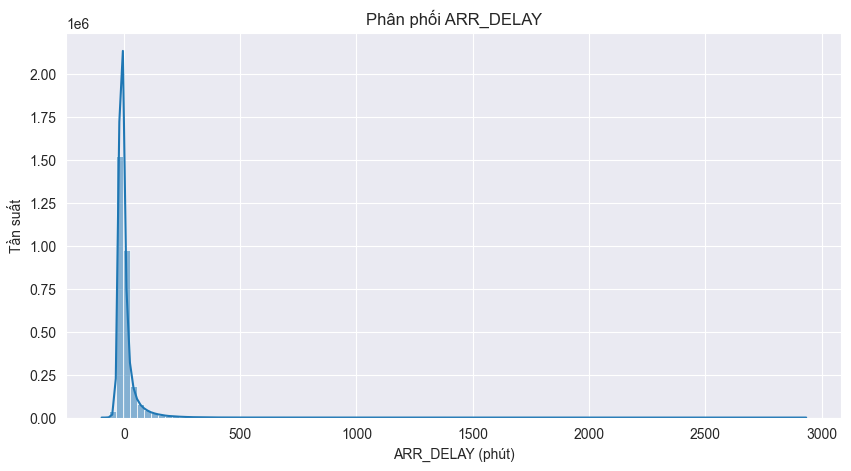

In [91]:
plt.figure(figsize=(10,5))
sns.histplot(df['ARR_DELAY'], bins=100, kde=True)
plt.title("Phân phối ARR_DELAY")
plt.xlabel("ARR_DELAY (phút)")
plt.ylabel("Tần suất")
plt.show()

Vẽ Boxplot để XÁC NHẬN outlier

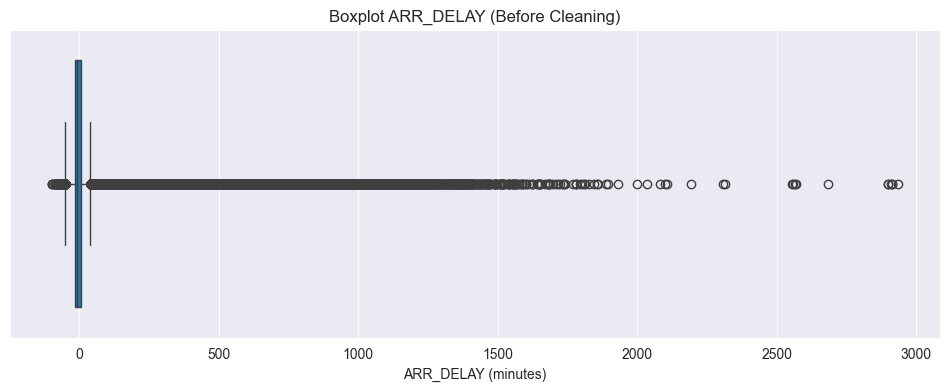

In [92]:
plt.figure(figsize=(12,4))
sns.boxplot(x=df['ARR_DELAY'])
plt.title("Boxplot ARR_DELAY (Before Cleaning)")
plt.xlabel("ARR_DELAY (minutes)")
plt.show()

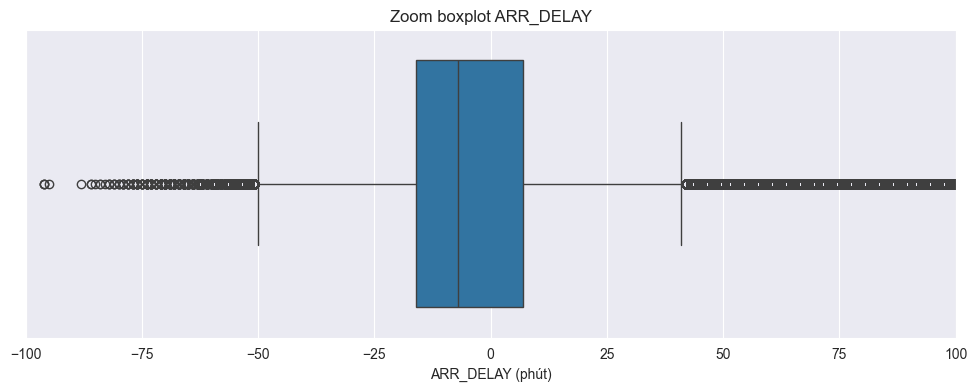

In [93]:
plt.figure(figsize=(12,4))
sns.boxplot(x=df['ARR_DELAY'])
plt.xlim(-100, 100)   # Giới hạn vùng nhìn
plt.title("Zoom boxplot ARR_DELAY")
plt.xlabel("ARR_DELAY (phút)")
plt.show()

Sau khi phóng to vùng chính của boxplot ARR_DELAY, có thể thấy phân phối thời gian đến thực tế tập trung rất mạnh trong vùng nhỏ từ khoảng −15 đến +5 phút. Đây cũng chính là khoảng IQR (interquartile range), cho thấy 50% số chuyến bay đến sớm hoặc trễ không quá 15 phút.

Median nằm xấp xỉ 0 phút, nghĩa là phần lớn chuyến bay đến đúng giờ hoặc đến sớm nhẹ.

Whisker dưới kéo dài đến khoảng −50 phút, phản ánh việc nhiều chuyến bay hạ cánh sớm hơn lịch trình. Whisker trên chỉ đến khoảng +40 phút, cho thấy các chuyến bay trễ nhẹ (dưới 40 phút) là phổ biến.

Tuy nhiên, bên ngoài whisker xuất hiện rất nhiều outlier trễ nặng, trong đó có những giá trị lên đến hơn 1000–3000 phút. Đây chủ yếu là những chuyến bay bị hủy hoặc diverted, không đại diện cho hành vi delay thông thường của hành khách.

Tuy nhiên sẽ không cắt outlier theo IQR, bới vì theo box plot những chuyến bay trễ từ 40 phút và sớm hơn 50 phút được xem là outlier.
Nhưng thực tế trễ 40, 60, 80 phút là chuyện cực bình thường trong dữ liệu máy bay. Sẽ xứ lí cắt theo domain.
Cắt theo domain nghĩa là cắt outlier dựa trên kiến thức thực tế (nghiệp vụ) của lĩnh vực hàng không

In [94]:
before = len(df)
df = df[df['ARR_DELAY'].between(-60, 300)]
after = len(df)
print("Số dòng ban đầu:", before)
print("Số dòng sau khi cắt:", after)
print("Số dòng bị cắt:", before - after)
print("Tỷ lệ bị cắt: {:.2f}%".format((before - after) / before * 100))

Số dòng ban đầu: 2913804
Số dòng sau khi cắt: 2902818
Số dòng bị cắt: 10986
Tỷ lệ bị cắt: 0.38%


Vẽ lại histogram & boxplot

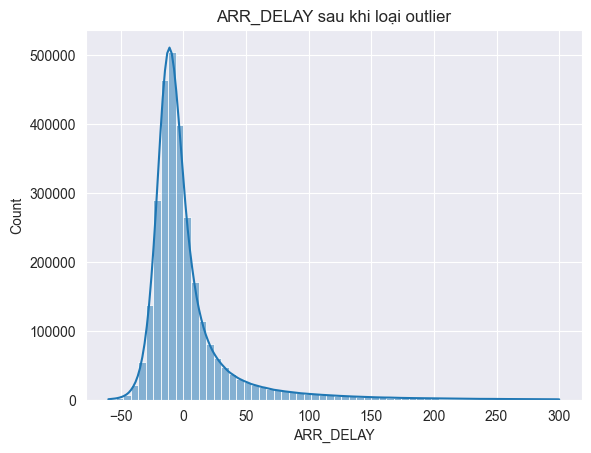

In [95]:
sns.histplot(df['ARR_DELAY'], bins=60, kde=True)
plt.title("ARR_DELAY sau khi loại outlier")
plt.show()

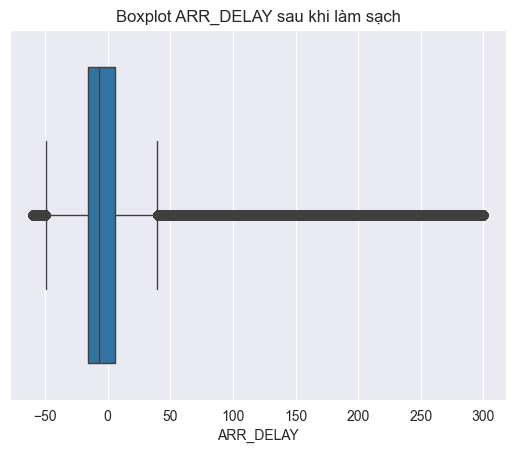

In [96]:
sns.boxplot(x=df['ARR_DELAY'])
plt.title("Boxplot ARR_DELAY sau khi làm sạch")
plt.show()

Delay theo nhóm

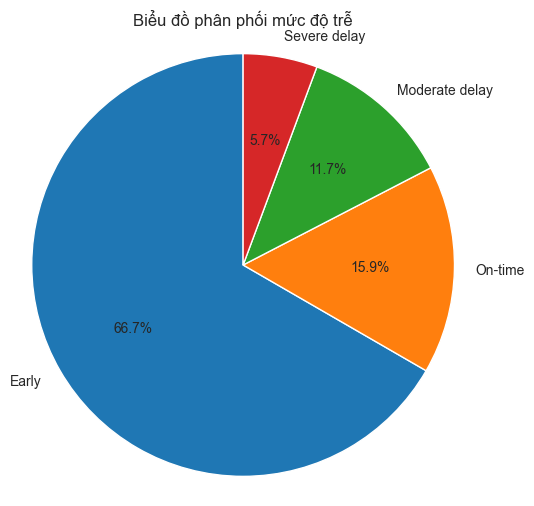

In [104]:
df["delay_group"] = pd.cut(
    df["ARR_DELAY"],
    bins=[-100, 0, 15, 60, 300],
    labels=["Early", "On-time", "Moderate delay", "Severe delay"]
)
delay_ratio = df["delay_group"].value_counts(normalize=True).sort_index() * 100
plt.figure(figsize=(6,6))

plt.pie(
    delay_ratio,
    labels=delay_ratio.index,
    autopct="%.1f%%",
    startangle=90
)

plt.title("Biểu đồ phân phối mức độ trễ")
plt.axis("equal")
plt.show()

Thời gian đến sớm (Early) chiếm ưu thế tuyệt đối: Phần lớn các chuyến (chiếm 66.7%) đến sớm.

Các trường hợp trễ ở mức độ nghiêm trọng (Severe delay) rất thấp: Tỷ lệ trễ nghiêm trọng chỉ là 5.7%. Điều này cho thấy các sự cố lớn, gây ảnh hưởng đáng kể đến lịch trình là hiếm gặp.

Trường hợp đến đúng giờ (On-time) khá tốt: Các chuyến đến đúng giờ chiếm 15.9%.

Trễ ở mức độ vừa phải (Moderate delay) là điểm cần theo dõi: Tỷ lệ trễ vừa phải (trễ ở mức độ trung bình) là 11.7%. Mặc dù không cao như tỷ lệ đến sớm, đây là nhóm lớn thứ hai sau "Early" và lớn hơn đáng kể so với "Severe delay".

EDA các biến categorical

Tần suất hãng bay

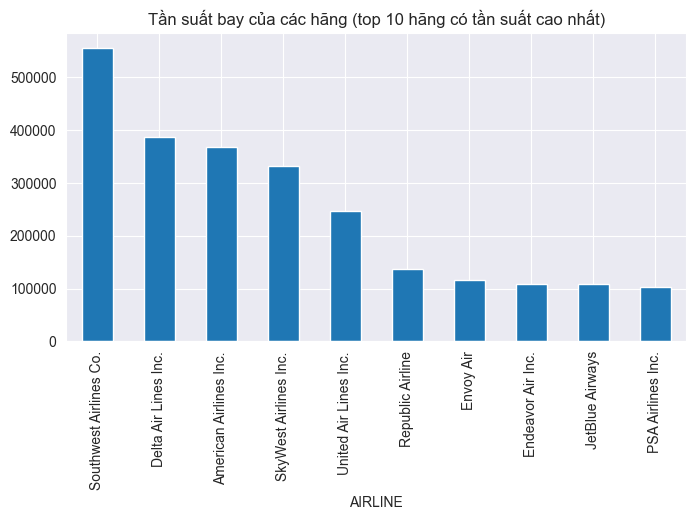

In [121]:
airline_cnt = df["AIRLINE"].value_counts()

plt.figure(figsize=(8,4))
airline_cnt.head(10).plot(kind="bar")
plt.title("Tần suất bay của các hãng (top 10 hãng có tần suất cao nhất)")
plt.show()

Tần suất bay phân thành các nhóm rõ rệt, điều này rất quan trọng khi xem xét vai trò của biến AIRLINE trong mô hình
* Hạng 1 (Dẫn Đầu): Southwest Airlines Co. > 500.000
* Hạng 2: Delta, American, SkyWest, United 250.000 - 400.000
* Hạng 3: Republic, Envoy, Endeavor, JetBlue, PSA < 150.000

Delay trung bình theo hãng

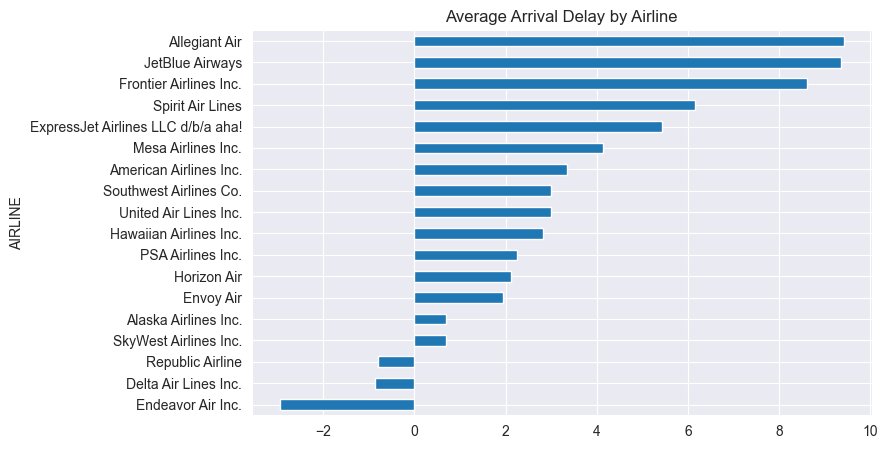

In [107]:
airline_delay = df.groupby("AIRLINE")["ARR_DELAY"].mean().sort_values()
plt.figure(figsize=(8,5))
airline_delay.plot(kind="barh")
plt.title("Average Arrival Delay by Airline")
plt.show()

Delay theo sân bay (top 20)

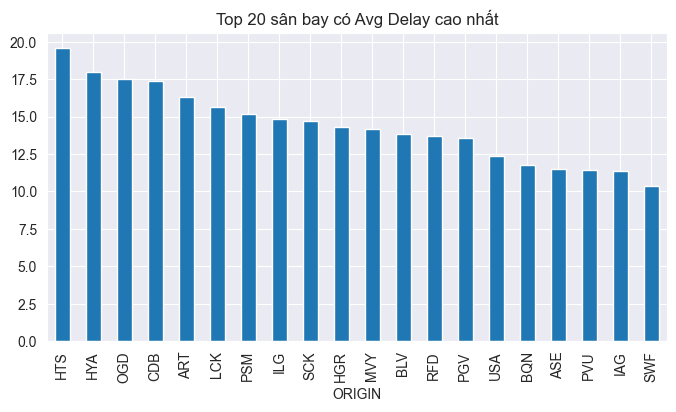

In [109]:
origin_delay = (
    df.groupby("ORIGIN")["ARR_DELAY"]
    .mean()
    .sort_values(ascending=False)
    .head(20)
)

origin_delay.plot(kind="bar", figsize=(8,4))
plt.title("Top 20 sân bay có Avg Delay cao nhất")
plt.show()

EDA biến thời gian

FL_DATE – theo năm

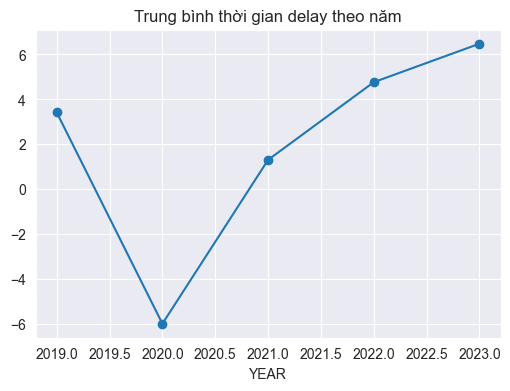

In [111]:
df["YEAR"] = df["FL_DATE"].dt.year

year_delay = df.groupby("YEAR")["ARR_DELAY"].mean()

year_delay.plot(marker="o", figsize=(6,4))
plt.title("Trung bình thời gian delay theo năm")
plt.show()


Giai đoạn 2019 - 2020: Sự sụt giảm mạnh (Giảm delay)
Giai đoạn 2020 - 2023: Xu hướng tăng liên tục (Tăng delay trở lại)
Nguyên nhân chính có thể do COVID-19

EDA THEO THÁNG

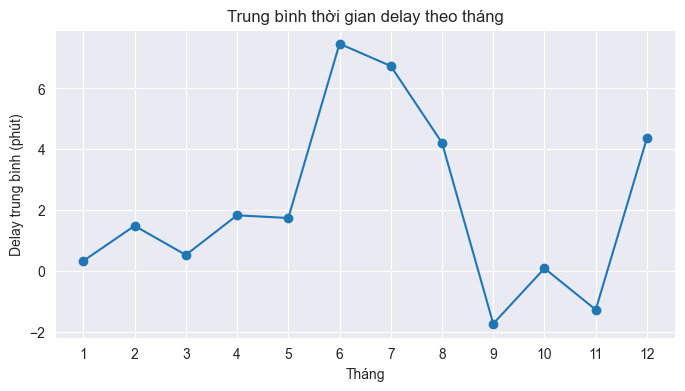

In [134]:
df["MONTH"] =  df["FL_DATE"].dt.month
month_delay = df.groupby("MONTH")["ARR_DELAY"].mean()
plt.figure(figsize=(8,4))
plt.plot(month_delay.index, month_delay.values, marker="o")

plt.xticks(range(1, 13))
plt.title("Trung bình thời gian delay theo tháng")
plt.xlabel("Tháng")
plt.ylabel("Delay trung bình (phút)")
plt.grid(True)

plt.show()


EDA THEO NGÀY TRONG THÁNG (1–31)

In [126]:
df["DAY"] = df["FL_DATE"].dt.day

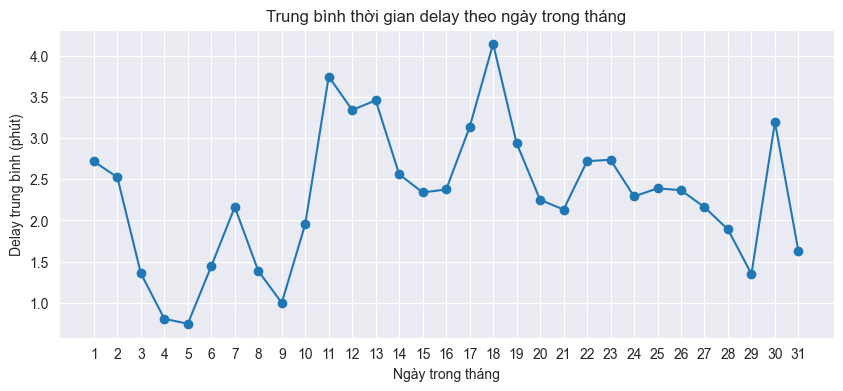

In [127]:
day_delay = df.groupby("DAY")["ARR_DELAY"].mean()
plt.figure(figsize=(10,4))
plt.plot(day_delay.index, day_delay.values, marker="o")

plt.xticks(range(1, 32))
plt.title("Trung bình thời gian delay theo ngày trong tháng")
plt.xlabel("Ngày trong tháng")
plt.ylabel("Delay trung bình (phút)")
plt.grid(True)
plt.show()


EDA THEO THỨ TRONG TUẦN

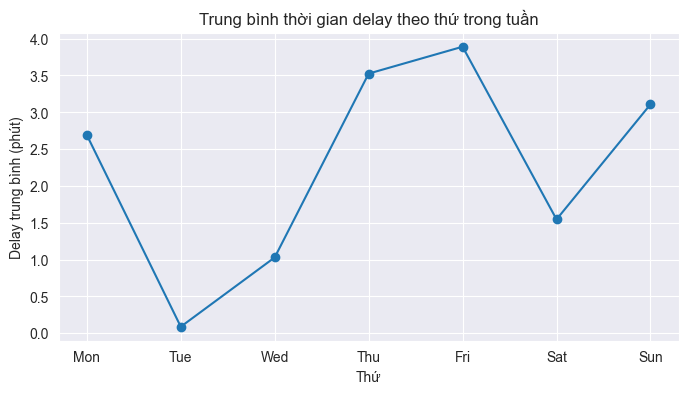

In [129]:
df["FL_DATE"] = pd.to_datetime(df["FL_DATE"])
df["WEEKDAY"] = df["FL_DATE"].dt.weekday
weekday_delay = df.groupby("WEEKDAY")["ARR_DELAY"].mean()
plt.figure(figsize=(8,4))

plt.plot(
    ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"],
    weekday_delay.values,
    marker="o"
)

plt.title("Trung bình thời gian delay theo thứ trong tuần")
plt.xlabel("Thứ")
plt.ylabel("Delay trung bình (phút)")
plt.grid(True)

plt.show()


Thời gian trong ngày – CRS_DEP_TIME

In [112]:
df["dep_hour"] = df["CRS_DEP_TIME"] // 100

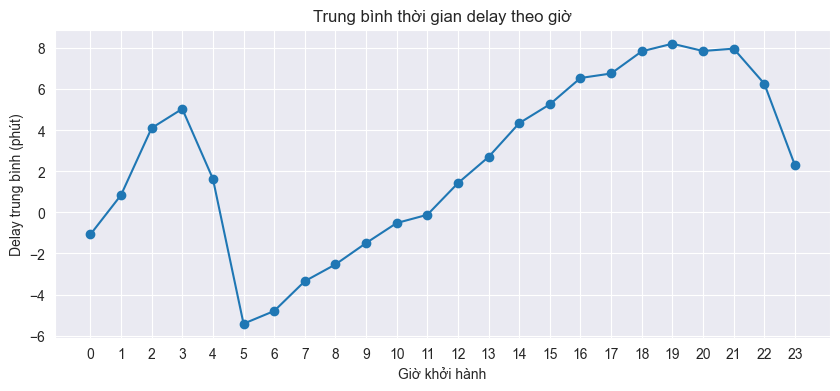

In [123]:
plt.figure(figsize=(10,4))
hour_delay.plot(marker="o")

plt.xticks(range(0, 24))
plt.title("Trung bình thời gian delay theo giờ")
plt.xlabel("Giờ khởi hành")
plt.ylabel("Delay trung bình (phút)")
plt.grid(True)

plt.show()


Sáng sớm / tối → delay cao

EDA biến numerical

CRS_ELAPSED_TIME

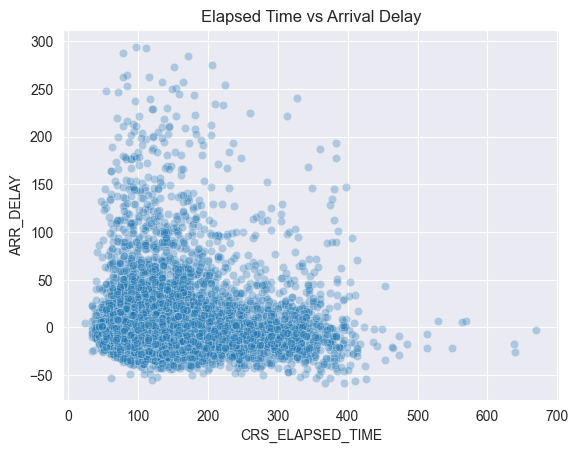

In [117]:
sns.scatterplot(
    x="CRS_ELAPSED_TIME",
    y="ARR_DELAY",
    data=df.sample(10000),
    alpha=0.3
)
plt.title("Elapsed Time vs Arrival Delay")
plt.show()

Quan hệ phi tuyến

Bay dài → delay “ít nghiêm trọng hơn”

DISTANCE

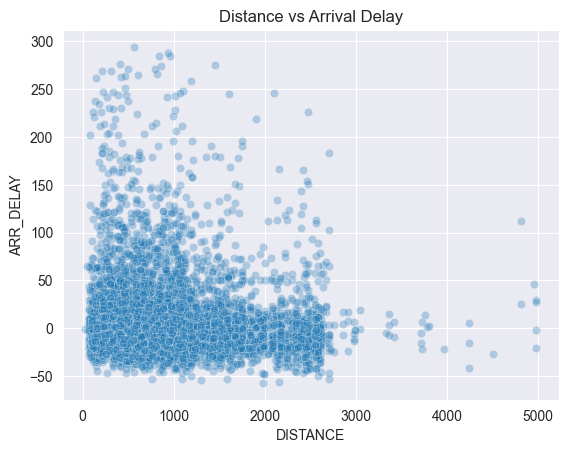

In [118]:
sns.scatterplot(
    x="DISTANCE",
    y="ARR_DELAY",
    data=df.sample(10000),
    alpha=0.3
)
plt.title("Distance vs Arrival Delay")
plt.show()

Quan hệ phi tuyến

Bay xa → delay “ít nghiêm trọng hơn”

Correlation (numerical)

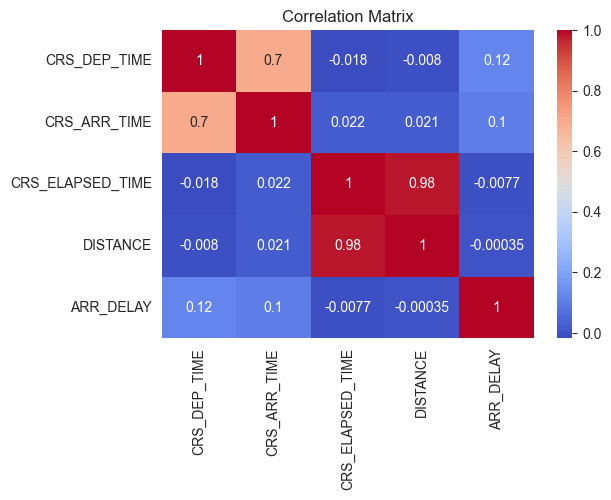

In [119]:
num_cols = [
    "CRS_DEP_TIME", "CRS_ARR_TIME",
    "CRS_ELAPSED_TIME", "DISTANCE",
    "ARR_DELAY"
]

plt.figure(figsize=(6,4))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

Không có tương quan tuyến tính mạnh

Feature Engineering (FE) & Encoding dựa trên insight từ EDA

Feature Engineering từ thời gian bay

EDA cho thấy độ trễ chuyến bay thay đổi đáng kể theo thời điểm trong ngày.
Việc sử dụng trực tiếp CRS_DEP_TIME (dạng HHMM) khiến mô hình khó học được pattern thời gian.

In [122]:
df["dep_hour"] = df["CRS_DEP_TIME"] // 100
df["arr_hour"] = df["CRS_ARR_TIME"] // 100

Bay đêm & giờ cao điểm

Từ EDA, các chuyến bay khởi hành vào ban đêm và giờ cao điểm
có xu hướng trễ nhiều hơn do hạn chế vận hành và mật độ giao thông cao.

In [124]:
# Bay ban đêm
df["is_night_flight"] = df["dep_hour"].isin([0,1,2,3,4]).astype(int)

# Giờ cao điểm
df["is_rush_hour"] = df["dep_hour"].between(11, 23).astype(int)


Chu kỳ tháng

Tháng trong năm mang tính chu kỳ (periodic).
Việc dùng sin/cos giúp mô hình học được tính liên tục giữa tháng 12 và tháng 1.

In [135]:
df["month_sin"] = np.sin(2 * np.pi * df["MONTH"] / 12)
df["month_cos"] = np.cos(2 * np.pi * df["MONTH"] / 12)

Ngày và mùa cao điểm

In [136]:
# Cuối tuần
df["is_hot_day"] = df["WEEKDAY"].isin([0,4,5,7]).astype(int)

# Mùa cao điểm (hè)
df["is_hot_season"] = df["MONTH"].isin([6,7,8,12]).astype(int)


Encoding AIRLINE – One-Hot Encoding

AIRLINE có số lượng category thấp (18 hãng)
và không mang thứ tự → One-hot encoding là phù hợp và an toàn.

In [137]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(
    sparse_output=False,
    handle_unknown="ignore"
)

airline_ohe = ohe.fit_transform(df[["AIRLINE"]])

airline_ohe_df = pd.DataFrame(
    airline_ohe,
    columns=ohe.get_feature_names_out(["AIRLINE"]),
    index=df.index
)


Encoding ORIGIN, DEST – Target Encoding

In [138]:
# ORIGIN
origin_te = df.groupby("ORIGIN")["ARR_DELAY"].mean()
df["ORIGIN_TE"] = df["ORIGIN"].map(origin_te)

# DEST
dest_te = df.groupby("DEST")["ARR_DELAY"].mean()
df["DEST_TE"] = df["DEST"].map(dest_te)

In [141]:
num_features = [
    "CRS_ELAPSED_TIME", "DISTANCE",
    "dep_hour", "arr_hour",
    "is_night_flight", "is_rush_hour",
    "is_hot_day", "is_hot_season",
    "month_sin", "month_cos",
    "ORIGIN_TE", "DEST_TE"
]

X_num = df[num_features]

X = pd.concat([X_num, airline_ohe_df], axis=1)
